## Practice Exericse (PolynomialExercises)

In [9]:
from pathlib import Path
import sys

current_dir = Path.cwd()

project_root = current_dir.parent

sys.path.insert(0,str(project_root))

from config import DATASETS_DIR, HORSE_POWER


In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [11]:
#loading the dataset
df = pd.read_csv(HORSE_POWER)

#feature and target variable
X = df[['Horsepower']].values
y = df[['Acceleration']].values


#### Visualization of polynomial reg model at different degrees and R2 score

R2 score for polynomial regression model at degree 1 is 0.034075
R2 score for polynomial regression model at degree 2 is 0.988620
R2 score for polynomial regression model at degree 3 is 0.998927
R2 score for polynomial regression model at degree 4 is 0.999028


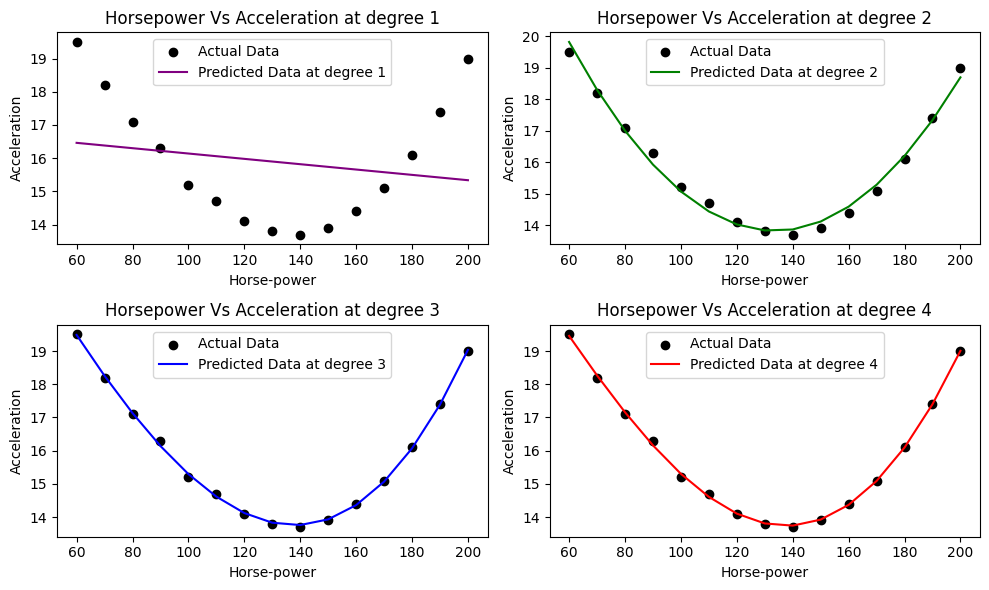

In [12]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

degrees = [1,2,3,4]
color=['Purple','Green','blue','red']
plt.figure(figsize=(10,6))

for i, degree in enumerate(degrees):
    plt.subplot(2, 2 , i+1)

    #fit the model
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    ln_poly = LinearRegression()
    ln_poly.fit(X_poly,y)

    plt.scatter(X,y,color='Black',label='Actual Data')
    plt.plot(X,ln_poly.predict(X_poly),color=color[i],label=f'Predicted Data at degree {degree}')
    plt.title(f"Horsepower Vs Acceleration at degree {degree}")
    plt.ylabel('Acceleration')
    plt.xlabel('Horse-power')
    plt.legend()


    #comparing R2 score at different degrees.
    
    R2 = r2_score(y,ln_poly.predict(X_poly))

    print(f'R2 score for polynomial regression model at degree {degree} is {R2:4f}')
plt.tight_layout()
plt.show()


##### Comparing the linear and poly regression 

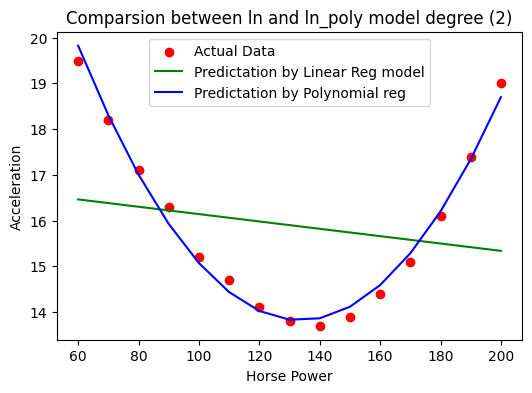

In [13]:

# Polynomial regression model
degree=2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

ln_poly = LinearRegression()
ln_poly.fit(X_poly,y)


ln = LinearRegression()
ln.fit(X,y)

plt.figure(figsize=(6,4))
plt.scatter(X,y,color='r',label='Actual Data')
plt.plot(X,ln.predict(X),color='green',label='Predictation by Linear Reg model')
plt.plot(X,ln_poly.predict(X_poly),color='blue',label='Predictation by Polynomial reg')
plt.title(f"Comparsion between ln and ln_poly model degree ({degree})")
plt.ylabel("Acceleration")
plt.xlabel("Horse Power")
plt.legend()
# plt.tight_layout()
plt.show()